<a href="https://colab.research.google.com/github/NataliiaZubenia/NMR_prediction/blob/main/NMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NMR_Data_with_Descriptors.csv to NMR_Data_with_Descriptors.csv


In [ ]:
import pandas as pd

df = pd.read_csv("NMR_Data_with_Descriptors.csv", delimiter=';')
df.head()

,Substnse,Slope,Group,Solvent,Code,ID,Name,SMILES,alpha,beta,pi_star,MolWt,TPSA,NumHDonors,NumHAcceptors,NumRotableBonds,AromaticProportion
0,NZ_29_H3_Toluene,3.06,H3,Toluene,1.1,NZ_29,2-nitrobenzaldehyde,O=Cc1ccccc1[N+](=O)[O-],0.0,0.11,0.54,151.121,60.21,0,3,2,0.090909
1,NZ_29_H4_Toluene,3.57,H4,Toluene,1.2,NZ_29,NaN,O=Cc1ccccc1[N+](=O)[O-],0.0,0.11,0.54,151.121,60.21,0,3,2,0.090909
2,NZ_29_H5_Toluene,3.37,H5,Toluene,1.3,NZ_29,NaN,O=Cc1ccccc1[N+](=O)[O-],0.0,0.11,0.54,151.121,60.21,0,3,2,0.090909
3,NZ_29_H6_Toluene,2.45,H6,Toluene,1.4,NZ_29,NaN,O=Cc1ccccc1[N+](=O)[O-],0.0,0.11,0.54,151.121,60.21,0,3,2,0.090909
4,NZ_29_CHO_Toluene,3.52,CHO,Toluene,1.5,NZ_29,NaN,O=Cc1ccccc1[N+](=O)[O-],0.0,0.11,0.54,151.121,60.21,0,3,2,0.090909


In [ ]:
!pip install pandas rdkit xgboost scikit-learn


import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 55.1 MB/s eta 0:00:00


RMSE: 1.5896


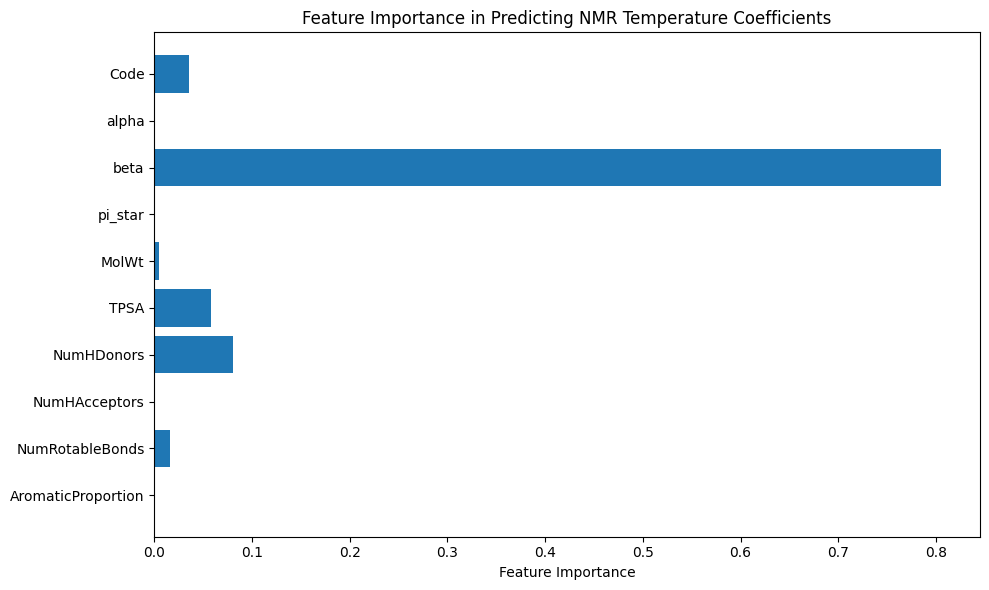

In [ ]:
features = ['Code', 'alpha', 'beta', 'pi_star', 'MolWt', 'TPSA',
            'NumHDonors', 'NumHAcceptors', 'NumRotableBonds',
            'AromaticProportion']
X = df[features]
y = df['Slope']

# Розбиття на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Побудова моделі
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'RMSE: {rmse:.4f}')

# Графік важливості ознак
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features, model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting NMR Temperature Coefficients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
results_df = X_test.copy()
results_df['Actual_Slope'] = y_test
results_df['Predicted_Slope'] = y_pred
results_df['Substnse'] = df.loc[X_test.index, 'Substnse']

print(results_df[['Substnse', 'Actual_Slope', 'Predicted_Slope']])


              Substnse  Actual_Slope  Predicted_Slope
154     NZ_39_H6_CDCl3          0.67         0.681323
215    NZ_44_CHO_CDCl3          1.91         1.196139
15       NZ_34_H3_TCHE          1.01         3.539446
173     NZ_48_H6_CDCl3          1.08         1.295368
158     NZ_37_H5_CDCl3          0.74         0.770590
125      NZ_75_H6_DMSO         -0.37         0.115647
97      NZ_83_CH3_DMSO          0.09        -0.373729
25       NZ_36_H2_TCHE          0.64         1.045764
60       NZ_26_H6_DMSO         -0.33        -0.624163
68      NZ_1.1_H4_DMSO         -0.59        -0.232736
126     NZ_75_CHO_DMSO          0.09         0.115647
163     NZ_38_H5_CDCl3          0.68         0.691608
142      NZ_43_H5_DMSO         -0.08        -0.064317
115      NZ_64_H5_DMSO         -0.64        -0.596461
45        NZ_57_H2_DMF         -0.37        -0.134841
9    NZ_32_CHO_Toluene          4.09         2.739964
100     NZ_70_CH3_DMSO          0.05        -0.158912
96      NZ_83_CHO_DMSO      

In [ ]:
results_df.to_csv("NMR_Predicted_vs_Actual.csv", index=False)


In [ ]:
from google.colab import files
files.download("NMR_Predicted_vs_Actual.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

            Substnse  Actual_Slope  Predicted_Slope
154   NZ_39_H6_CDCl3          0.67         0.681323
215  NZ_44_CHO_CDCl3          1.91         1.196139
15     NZ_34_H3_TCHE          1.01         3.539446
173   NZ_48_H6_CDCl3          1.08         1.295368
158   NZ_37_H5_CDCl3          0.74         0.770590
125    NZ_75_H6_DMSO         -0.37         0.115647
97    NZ_83_CH3_DMSO          0.09        -0.373729
25     NZ_36_H2_TCHE          0.64         1.045764
60     NZ_26_H6_DMSO         -0.33        -0.624163
68    NZ_1.1_H4_DMSO         -0.59        -0.232736


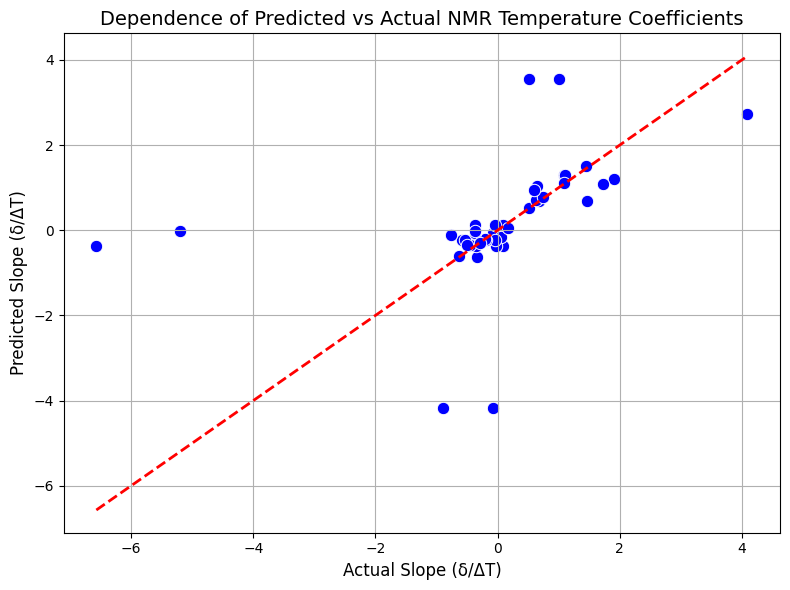

In [ ]:
results_df = X_test.copy()
results_df['Substnse'] = df.loc[X_test.index, 'Substnse']
results_df['Actual_Slope'] = y_test
results_df['Predicted_Slope'] = y_pred

print(results_df[['Substnse', 'Actual_Slope', 'Predicted_Slope']].head(10))

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual_Slope', y='Predicted_Slope', data=results_df, s=80, color='blue', edgecolor='w')
plt.plot([results_df['Actual_Slope'].min(), results_df['Actual_Slope'].max()],
         [results_df['Actual_Slope'].min(), results_df['Actual_Slope'].max()],
         'r--', linewidth=2)
plt.xlabel('Actual Slope (δ/ΔT)', fontsize=12)
plt.ylabel('Predicted Slope (δ/ΔT)', fontsize=12)
plt.title('Dependence of Predicted vs Actual NMR Temperature Coefficients', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1680690368.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Actual_Slope', data=results_df, palette='coolwarm')


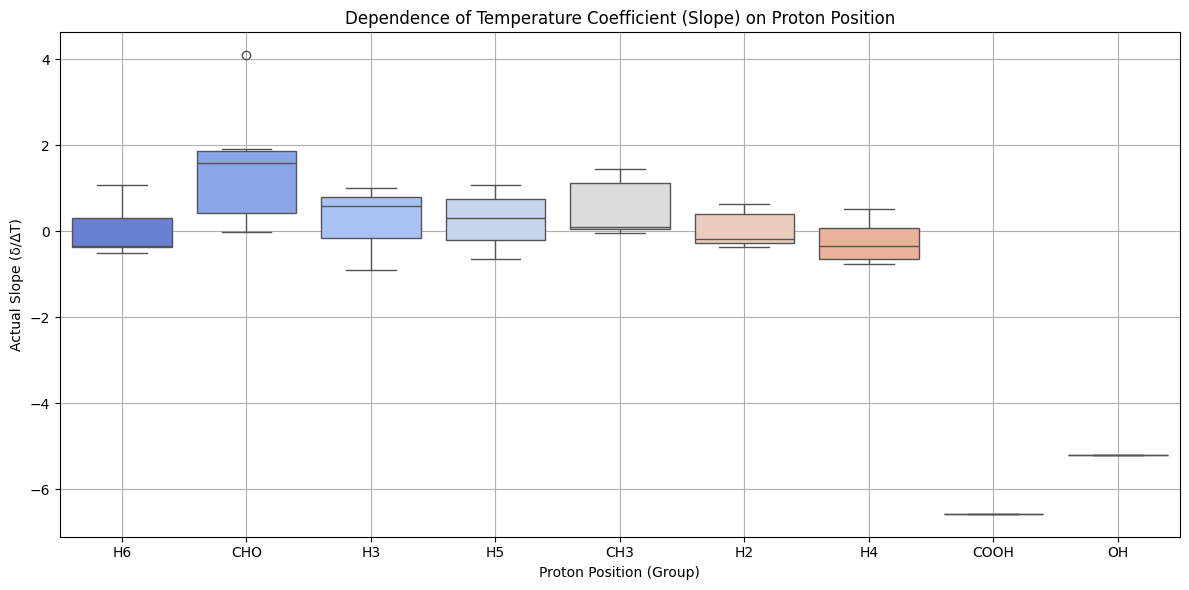

/tmp/ipython-input-12-1680690368.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Solvent', y='Actual_Slope', data=results_df, palette='viridis')


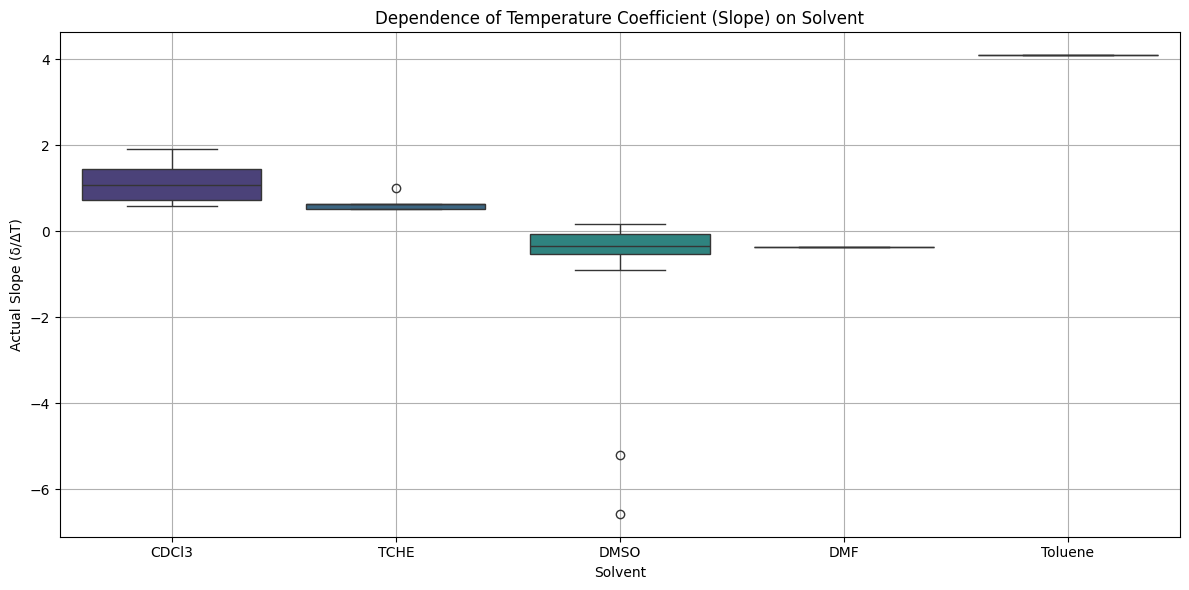

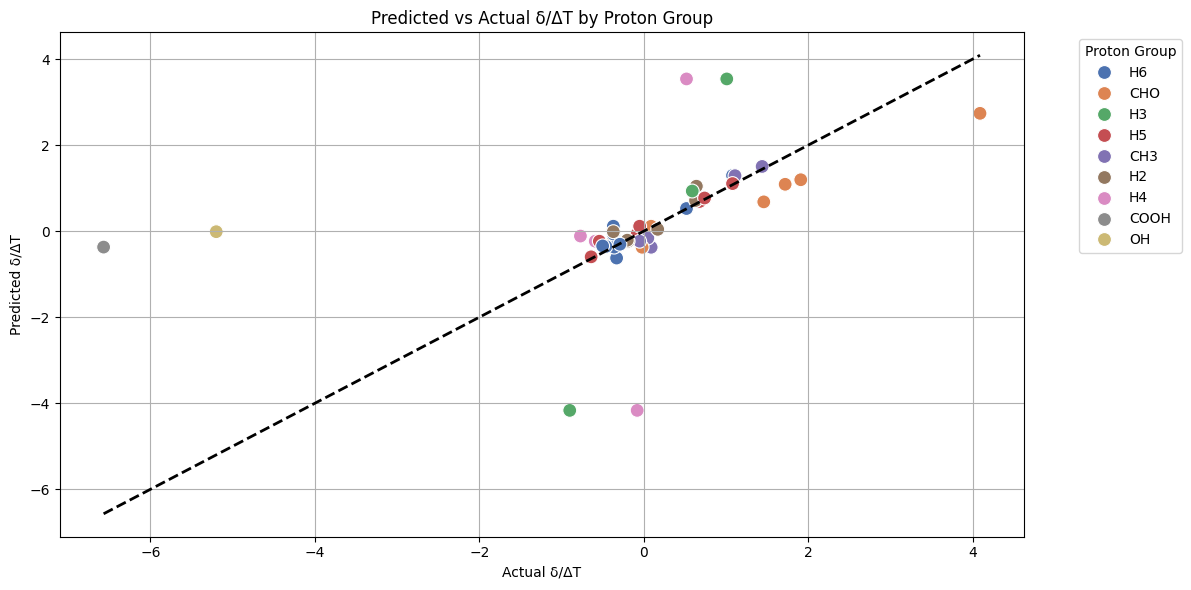

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = X_test.copy()
results_df['Substnse'] = df.loc[X_test.index, 'Substnse']
results_df['Group'] = df.loc[X_test.index, 'Group']
results_df['Solvent'] = df.loc[X_test.index, 'Solvent']
results_df['Actual_Slope'] = y_test
results_df['Predicted_Slope'] = y_pred


plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Actual_Slope', data=results_df, palette='coolwarm')
plt.title('Dependence of Temperature Coefficient (Slope) on Proton Position')
plt.xlabel('Proton Position (Group)')
plt.ylabel('Actual Slope (δ/ΔT)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Solvent', y='Actual_Slope', data=results_df, palette='viridis')
plt.title('Dependence of Temperature Coefficient (Slope) on Solvent')
plt.xlabel('Solvent')
plt.ylabel('Actual Slope (δ/ΔT)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual_Slope', y='Predicted_Slope', hue='Group', data=results_df, s=100, edgecolor='w', palette='deep')
plt.plot([results_df['Actual_Slope'].min(), results_df['Actual_Slope'].max()],
         [results_df['Actual_Slope'].min(), results_df['Actual_Slope'].max()], 'k--', linewidth=2)
plt.title('Predicted vs Actual δ/ΔT by Proton Group')
plt.xlabel('Actual δ/ΔT')
plt.ylabel('Predicted δ/ΔT')
plt.legend(title='Proton Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


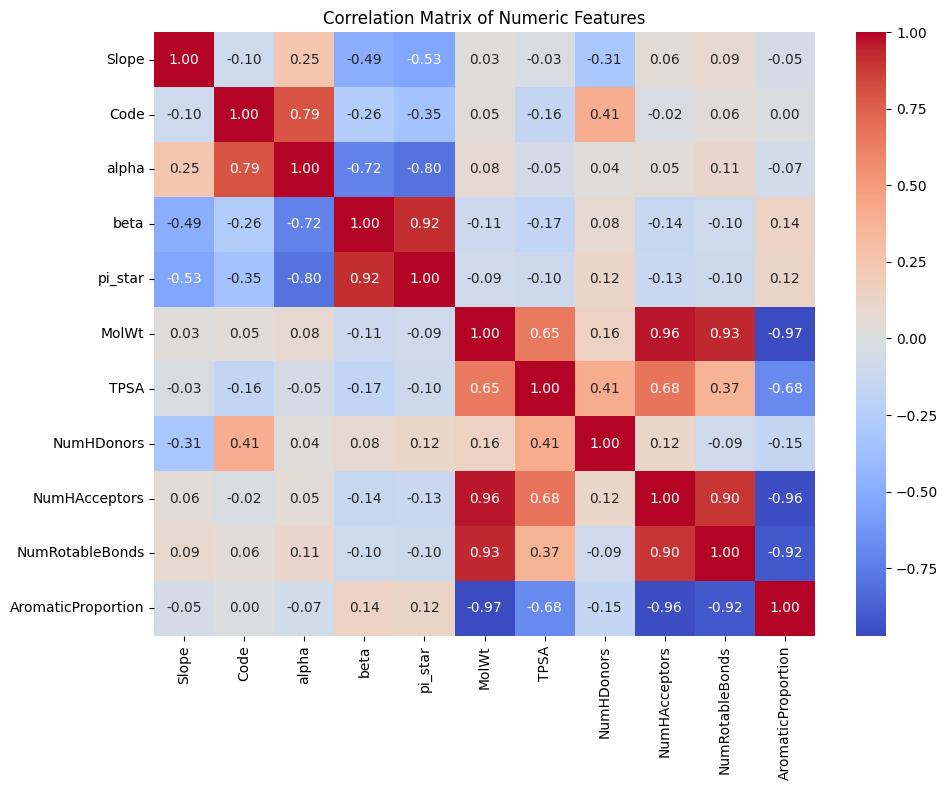

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

<Axes: xlabel='Slope', ylabel='Count'>

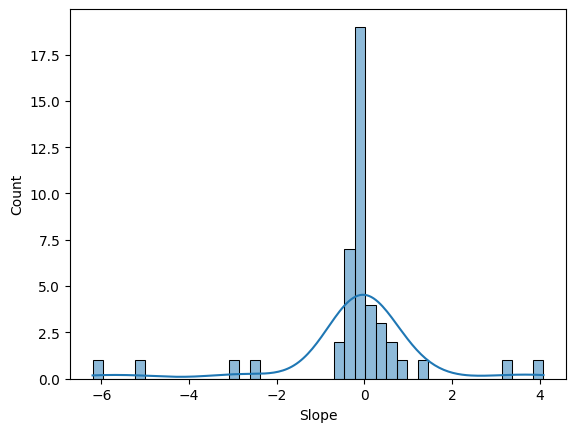

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)


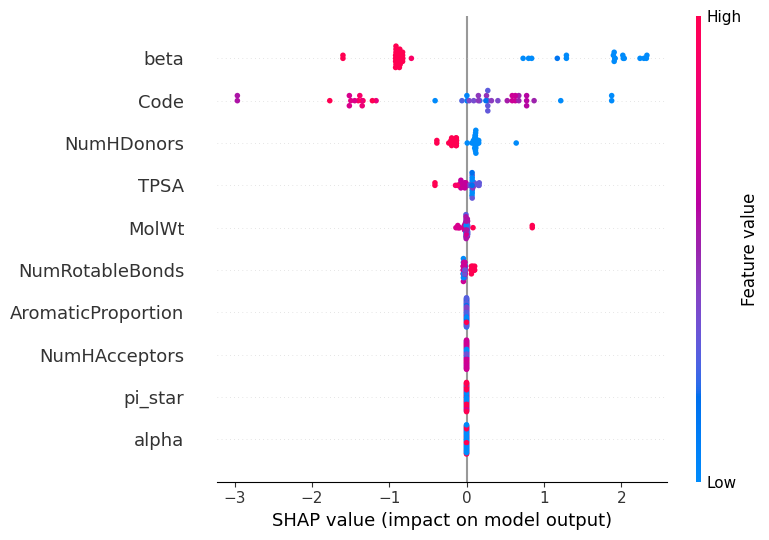

In [ ]:
!pip install shap
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
X_all = df[features]

y_all_pred = model.predict(X_all)


results_all_df = df.copy()
results_all_df['Predicted_Slope'] = y_all_pred


results_all_df = results_all_df[['Substnse', 'Group', 'Solvent', 'Slope', 'Predicted_Slope', 'SMILES'] + features]


results_all_df.to_csv("All_NMR_Predictions.csv", index=False)


from google.colab import files
files.download("All_NMR_Predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>